# Hausaufgabe 5
## Schallerzeugung durch einen umströmten Zylinder (Teil 2)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->

### 0) Verantwortlichkeit

**Tragen Sie in der folgenden Tabelle die Namen der Gruppenmitglieder ein, die an der Lösung dieses Notebooks signifikant mitgewirkt haben.**

| Gruppe |       Name        |       E-Mail       |
|--------|-------------------|--------------------|


---

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig Wirbelstraßen aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

### 1) Einlesen der Daten

Zusätzlich zu dem in Hausaufgabe 4 ausgewerteten Messungen wurde die Schallabstrahlung von 9 Zylindern unterschiedlichen Durchmessers bei 13 verschiedenen Strömungsgeschwindigkeiten gemessen und der jeweilige Hiebton bestimmt.
Die Ergebnisse sind in tabellarischer Form in der Datei `vf.csv` eingetragen.

**1.1) Laden Sie die detektierten Hiebtöne aus der Datei `vf.csv`.**

  * Verwenden Sie für die Arrays mit den jeweiligen Daten die Variablennamen:
    * `d` für Durchmesser
    * `v` für Geschwindigkeiten
    * `f` für Frequenzen
  * Verwenden Sie im Verlauf der gesamten Aufgabe in den Variablen nur [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem#SI-Einheiten). Rechnen Sie ggf. um.
  * *Zusatzaufgabe (freiwillig): Lesen Sie neben den Frequenzen auch die Durchmesser-Werte automatisiert ein, anstelle sie per Hand einzugeben.*
  * Geben Sie aus, wie viele Werte Sie jeweils für Durchmesser und Geschwindigkeit haben. Wie groß ist der kleinste Durchmesser?

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import pandas as pd
from numpy import array

data = pd.read_csv('vf.csv', skiprows = [0] , sep=',', header=None)

# Durchmesser in m
d_0 = data.iloc[0, 1:].values
d = [int(x[6:-2])/(10**3) for x in d_0] #formatting

# Frequenzen
f = data.iloc[1:,1:].values.astype(float)

# Geschwindigkeiten
v = data.iloc[:, 0].values[1:].astype(float)

print(d)
print(f)
print(v)

[0.003, 0.004, 0.005, 0.007, 0.009, 0.011, 0.013, 0.016, 0.02]
[[ 543.04  408.1   329.83  234.27  184.14  149.89  125.13  101.42   81.67]
 [ 702.87  522.33  425.56  297.68  234.59  190.87  163.48  132.67  105.9 ]
 [ 914.43  689.08  552.86  400.17  307.89  254.11  215.73  173.16  138.9 ]
 [1210.97  918.65  740.07  524.51  411.06  337.24  284.78  230.46  185.08]
 [1446.13 1087.37  881.73  622.21  483.8   397.48  336.6   274.14  217.86]
 [1638.99 1231.13  992.45  710.41  548.76  449.56  381.22  308.65  247.42]
 [1962.34 1462.56 1177.07  843.65  651.46  537.05  452.85  367.34  295.3 ]
 [2236.47 1677.31 1341.23  957.86  745.89  610.97  518.58  420.16  336.71]
 [2447.92 1841.72 1471.93 1055.76  819.18  666.91  566.73  460.14  369.54]
 [2694.82 2026.79 1621.68 1154.95  899.34  736.58  621.65  510.68  405.74]
 [2892.18 2169.96 1742.79 1243.99  965.24  789.57  670.82  544.51  436.51]
 [2988.94 2249.23 1788.5  1284.97  996.56  815.28  692.82  559.41  449.39]
 [3112.06 2343.26 1864.81 1337.72 104

In [33]:
# Hier sind einige Plausibilitätstests:
assert len(d)==len(v)-4
assert f.size>110
assert f.shape==(len(v),len(d))
assert 1e-3<min(d)<1e-2

**1.2) Visualisieren Sie die Daten für eine bessere Übersicht.**

  * Stellen Sie in Abb. 1 den Verlauf der Frequenzen über der Strömungsgeschwindigkeit für jeden Durchmesser dar.
  * Stellen Sie in Abb. 2 den Verlauf der Frequenzen über dem Zylinderdurchmesser für jede Strömungsgeschwindigkeit dar.  
  * Zeichnen Sie in die Abbildungen 1 und 2 die gefundenen Hiebtöne aus der letzten HA ein.
  * Stellen Sie in Abb. 3 die Abhängigkeit der Frequenz von sowohl der Strömungsgeschwindigkeit als auch des Zylinderdurchmessers dar (z.B. über einen Konturplot)
  * Fügen Sie jeweils eine aussagekräftige Legende bzw. Farbskala hinzu und achten Sie auf korrekte Achsenbeschriftungen.


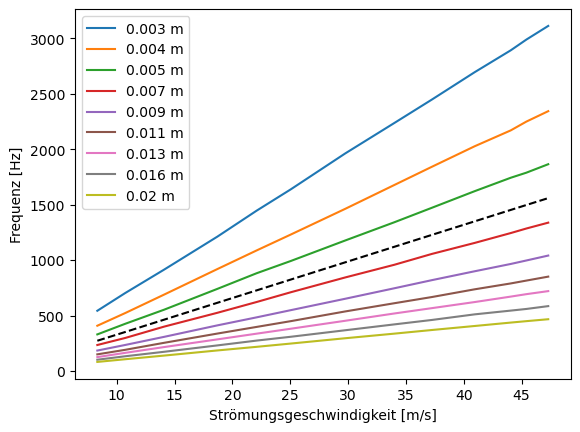

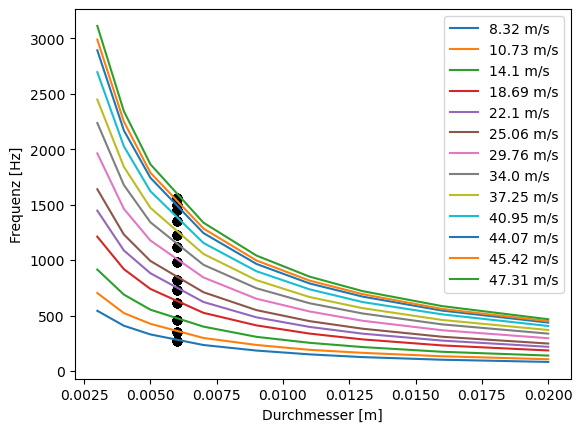

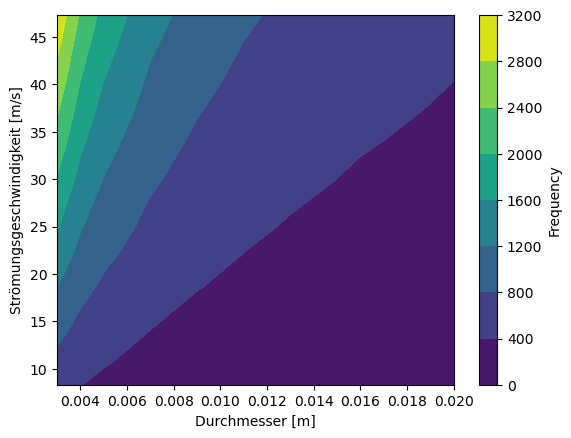

In [34]:
# Hiebtöne aus HA4
fhieb = [1497.0, 462.9, 824.9, 1227.5, 1559.1, 727.1, 351.6, 980.1, 1452.5, 1349.6, 272.7, 614.6, 1120.0]

# Abb. 1
for i, d_i in enumerate(d):
    plt.plot(v, f[:,i], label=str(d_i)+' m')
    plt.legend()
plt.plot(v,np.sort(fhieb),linestyle='--',color='k')  

plt.xlabel('Strömungsgeschwindigkeit [m/s]')
plt.ylabel('Frequenz [Hz]')

plt.show()

# Abb. 2
for i, v_i in enumerate(v):
    plt.plot(d, f[i,:], label=str(v_i)+' m/s')
    plt.scatter([0.006]*13,np.sort(fhieb), color='k')
    plt.legend()
#plt.plot(d,fhieb,linestyle='--',color='k')  

plt.xlabel('Durchmesser [m]')
plt.ylabel('Frequenz [Hz]')
plt.show()

# Abb.3
fig, ax = plt.subplots()
contour = ax.contourf(d, v, f) # Create the contour plot
cbar = fig.colorbar(contour)
cbar.set_label('Frequency')

ax.set_xlabel('Durchmesser [m]')
ax.set_ylabel('Strömungsgeschwindigkeit [m/s]')

plt.show()

### 2) Modellbildung

Die Frequenz des Hiebtons hängt mindestens von den zwei Größen Durchmesser und Geschwindigkeit ab:

$$
f = f(d,v)
$$

Die Abhängigkeit von $v$ (Abb. 1) wurde in HA 4 mittels der Regressionsgerade gefunden. 
Die Abhängigkeit von $d$ (Abb. 2) könnte nach demselben Schema geschehen, allerdings trifft die Annahme einer direkt linearen Abhängigkeit offensichtlich nicht zu.
Außerdem wäre es wünschenswert, beide Parameter einer einzigen Berechnungsformel übergeben zu können.

Im einfachsten Fall mit nur linearen Abhängigkeiten könnten wir schreiben:

$$
f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon
$$

Die Koeffizienten $\beta_n$ erfüllen denselben Zweck wie $a$ und $b$ aus HA 4. 
$\epsilon$ ist eine Störgröße, die als zufällig angenommen wird und die den Fehler beschreibt, den das Modell z.B. durch unbeobachtbare Abhängigkeiten macht.
Die Lösung eines Problems mithilfe einer solchen Formulierung geschieht über die [multiple lineare Regression](https://de.wikipedia.org/wiki/Multiple_lineare_Regression).

Nichtlineare Abhängigkeiten können mit diesem Schema auch untersucht werden, sofern eine Annahme zur Art der Nichtlinearität getroffen wird, z.B.:

$$
f(d,v) = \beta_1\,d + \beta_2\,v + \beta_3\,d^2 + \ldots + \beta_4\,\frac{d}{v} + \beta_5\,\frac{v}{d} + \ldots + \beta_6\,\sin(v^{\sqrt{d}}) + \ldots +  \epsilon
$$

Das Modell kann dabei beliebig komplex werden.
Allgemein können wir auch schreiben:

$$
f = \pmb{x} \cdot \pmb{\beta} + \epsilon~,
$$

wobei der Vektor $\pmb{x}$ die charakteristischen Größen wie $d$, $v$ oder daraus abgeleitete Terme enthält (im maschinellen Lernen wird hier auch von *Features* gesprochen) und $\pmb{\beta}$ die zunächst noch unbekannten Koeffizienten.

Natürlich sollen unsere Messdaten (gekennzeichnet mit Tilde $\tilde{}$) durch das Modell beschreibbar sein, sodass gilt:

$$
\tilde{f}_i = \pmb{x}_i \cdot \pmb{\beta} + \epsilon_i~.
$$
 
Der Index $i$ beschreibt eine konkrete Messung.
Wir können die Vektoren $\pmb{x}_i$ als Zeilen in eine Matrix $\pmb{X}$ schreiben, sodass sich ergibt:

$$
\pmb{\tilde{f}}  = \pmb{X} \cdot \pmb{\beta} + \pmb{\epsilon}~.
$$

In die Form dieser Gleichung wollen wir nun unsere Größen bringen.

**2.1) Erstellen Sie aus den Strömungsgeschwindigkeiten und Zylinderdurchmessern eine Modellmatrix $\pmb{X}$ und aus den zugehörigen Frequenzen den Messvektor $\pmb{\tilde{f}}$.**

  * Für die Generierung von $\pmb{X}$ muss bereits ein Modell angenommen werden. Verwenden Sie zunächst $\tilde{f}_i = \beta_0\cdot 1 + \beta_1\cdot d_i + \beta_2\cdot v_i + \epsilon_i$. Das Modell soll jedoch später leicht ausgetauscht werden können.
  * Schreiben Sie hierfür eine Funktion `model(d, v)`, die die $\pmb{X}$ abhängig von $\pmb{d}$ und $\pmb{v}$ je nach Modell berechnet und zurückgibt.
  * Damit $\pmb{X}$ als 2D-Array und $\pmb{\tilde{f}}$ als 1D-Array beschrieben werden können, müssen Daten, die in zweidimensionaler Form vorliegen, ggf. umsortiert werden. Lösen Sie dies, indem Sie Zeilen aneinanderketten.
  * Plotten Sie zur Überprüfung die Spalten der Matrix $\pmb{X}$ über $\pmb{\tilde{f}}$. Verwenden Sie die Variablen `X` und `f_tilde`.
 
_Hinweis: Der unbekannte Fehler $\epsilon_i$ ist immer implizit enthalten und muss hier nicht über eine eigene Variable "mitmodelliert" werden._

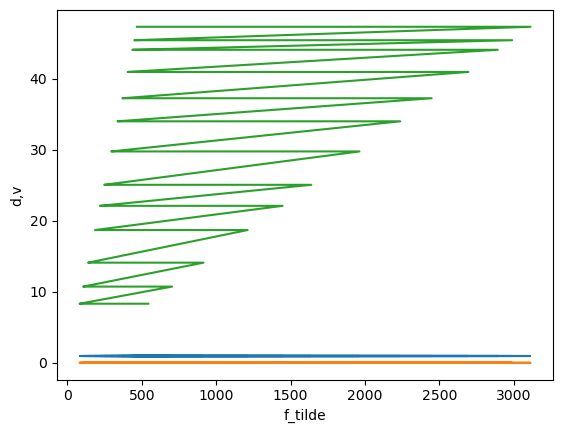

In [35]:
# Hier eigenen Code schreiben ...

def model(d,v,mod=1):
    # define X width
    size=0
    X = []
    m = 0
    
    if mod == 1: 
        size = 3
        X = np.zeros((len(v) * len(d), size))
        for i in range(len(v)):
            for j in range(len(d)):
                X[m, 0] = 1
                X[m, 1] = d[j]
                X[m, 2] = v[i]
                m += 1
    elif mod == 2: 
        size = 4
        X = np.zeros((len(v) * len(d), size))
        for i in range(len(v)):
            for j in range(len(d)):
                X[m, 0] = d[j]
                X[m, 1] = v[i]
                X[m, 2] = 1/(d[j]**2)
                X[m, 3] = 1/(v[i]**2)
                
                m += 1
    elif mod == 3: 
        size = 2 # ß3 wurde hier weggelassen
        X = np.zeros((len(v) * len(d), size))
        for i in range(len(v)):
            for j in range(len(d)):
                X[m, 0] = v[i]/d[j]
                X[m, 1] = (v[i] ** 3)/(d[j] ** 3)
                m += 1
    elif mod == 4: 
        size = 1 # ß3 wurde hier weggelassen
        X = np.zeros((len(v) * len(d), size))
        for i in range(len(v)):
            for j in range(len(d)):
                X[m, 0] = v[i]/d[j]
                m += 1
    
    return X 


X = model(d,v)
#print(X)

f_tilde = f.flatten()
for i in range(3):
    plt.plot(f_tilde,X[:,i])
    plt.xlabel('f_tilde')
    plt.ylabel('d,v')

In [36]:
# Hier sind einige Plausibilitätstests:
assert X.shape[0]>100
assert X.shape[1]==3 # (Gilt nur für das anfangs verwendete Modell)
assert len(f_tilde)==X.shape[0]

Angenommen, es existiert ein Modell für $f(d,v)$ mit bekannten Koeffizienten $\beta_j$, so kann dessen Güte anhand der Abweichungen von mit dem Modell berechneten zu den gemessenen Daten bewertet werden.
Diese Abweichungen werden häufig mithilfe der Summe der Fehlerquadrate (normiert mit der Anzahl der Messpunkte $N$) quantifiziert:

$$
\frac{1}{N}\sum_{i=1}^{N}(f(d_i,v_i) - \tilde{f}_i)^2 = \frac{1}{N}\| \pmb{f} - \pmb{\tilde{f}} \|_2^2
$$

Dieses Fehlermaß gilt es zu minimieren, um ein Modell möglichst genau an die Messdaten anzunähern.
Es wird daher auch als Kosten- oder Verlustfunktion bezeichnet.

**2.2) Schreiben Sie eine Funktion _loss()_, die die normierte Summe der Fehlerquadrate berechnet.**

  * Die Funktion soll als Parameter übergeben bekommen:
    * einen Koeffizienten-Vektor `beta`
    * eine Modell-Matrix `X`
    * einen Messwerte-Vektor `f_tilde`
  * Rückgabewert soll der berechnete Fehler sein.

In [37]:
# Hier eigenen Code schreiben ...
def loss(beta, X, f_tilde):
    f = X@beta
    return np.mean((f - f_tilde)**2)

print(loss(np.ones(3),model(d,v), f_tilde))

1113727.4759640854


In [38]:
# Hier ist ein Plausibilitätstest:
assert np.isclose(loss(np.array([1., 1., 1.]), X, f_tilde), 1113727.475964085)

Mithilfe eines geeigneten Algorithmus' soll nun der Koeffizientensatz $\pmb{\beta}$ gefunden werden, der obige Kostenfunktion minimiert.
Praktischerweise sind im Modul [*scipy.optimize*](https://docs.scipy.org/doc/scipy/reference/optimize.html) bereits zahlreiche Minimierungsalgorithmen implementiert, die auf das Problem angewendet werden können.

Für den Fall der Mehrfachregression bietet sich die im Modul enthaltene Funktion [*minimize()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) an.
Wichtig sind hier vor allem die ersten drei Parameter, die ihr übergeben werden können:
  * `fun` : die Funktion, deren Ergebnis minimal werden soll (zu übergeben als Objekt _ohne_ Klammern)
  * `x0` : Startwerte für die zu ermittelnden Koeffizienten (als Array zu übergeben)
  * `args`: weitere Argumente, die die Funktion beim Aufruf erwartet (je nach Parameterliste, als Tupel übergeben)
  
Voraussetzung ist, dass die Argumente der Parameterliste der zu minimierenden Funktion in der Reihenfolge `(x, *args)` erwartet werden, also zunächst die  Koeffizienten, dann weitere Parameter. 
Dies sollte mit der Funktion *loss()* gegeben sein.

Außerdem kann mit dem Parameter `method` beim Aufruf angegeben werden, welcher Lösungs-Algorithmus für das Problem verwendet werden soll. 
Verwenden Sie hier abweichend vom Default den `'Nelder-Mead'`-Algorithmus mit Standardparametern.


Die *minimize()*-Funktion gibt ein [OptimizeResult-Objekt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html) zurück.
Rufen wir die Funktion mit
```python
result = minimize(...)
```
auf, können z.B. folgende Eigenschaften abgerufen werden:
  * `result.x` : die gefundenen Koeffizienten
  * `result.success` : Boolean, der angibt, ob ein Minimum gefunden wurde
  * `result.message`: Bei nicht erfolgreich abgeschlossener Minimierung Grund für den Abbruch
  * `result.nit` : Anzahl der vom Algorithmus durchgeführten Iterationen


**2.3) Finden Sie ein möglichst simples Modell, dass die Daten möglichst gut beschreibt.**

  * Definieren Sie hier eine oder mehrere neue `model`-Funktionen, die Sie dann auf ihre Validität püfen. Aufgabe 2.1) soll unverändert bleiben.
  * Minimieren Sie die Kostenfunktion. Wählen Sie als Startwert für jeden der Koeffizienten 1.
  * Suchen Sie Koeffizienten mindestens für folgende Modelle:
    1.  $f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon$ 
    2.  $f(d,v) = \beta_1\,d + \beta_2\,v + \beta_3\,\frac{1}{d^2} + \beta_4\,\frac{1}{v^2} + \epsilon$ 
    3.  $f(d,v) = \beta_1\,\frac{v}{d}  + \beta_2\,\frac{v^3}{d^3} + \beta_3\,\frac{v^5}{d^5}  + \epsilon$
  * Geben Sie die Anzahl der Iterationen, den berechneten Koeffizientensatz und für diesen den Wert der Kostenfunktion aus. Geben Sie außerdem an, ob der Algorithmus das Minimum eindeutig gefunden hat.
  * Falls die Minimierung nicht erfolgreich/eindeutig war, versuchen Sie, das Modell zu ändern. Möglicherweise führt auch eine Vereinfachung zum Erfolg.
  * Plotten Sie jeweils das gemessene $\pmb{\tilde{f}}$ und das sich aus dem Modell ergebende $\pmb{f}$ in dasselbe Diagramm, um die Abweichung einschätzen zu können.
  
<!-- *  f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \beta_3\,\frac{d}{v}  + \beta_4\,\frac{v}{d}  + \epsilon -->

Model 1 Results:
Coefficients: [ 8.16015655e+02 -8.37152214e+04  2.89849585e+01]
Converged: True
Message: Optimization terminated successfully.
Iterations: 290
Fehler Modell 1: 117576.1539304236

Model 2 Results:
Coefficients: [-3.05363871e+00  1.77864861e+01  1.31080624e-02 -1.20508033e+01]
Converged: True
Message: Optimization terminated successfully.
Iterations: 185
Fehler Modell 2: 95996.9692841215

Model 3 Results:
Coefficients: [ 1.97378779e-01 -1.27004765e-13]
Converged: True
Message: Optimization terminated successfully.
Iterations: 120
Fehler Modell 3: 14.2906857536


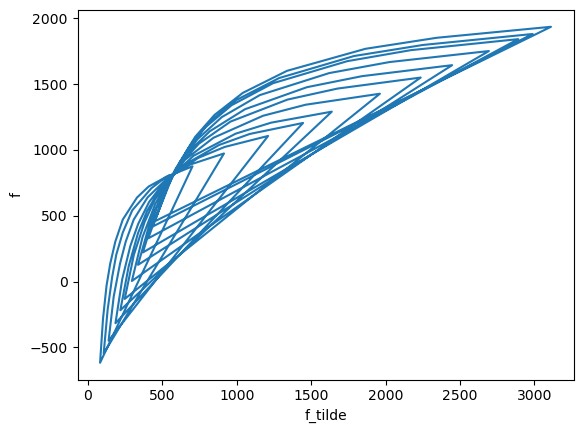

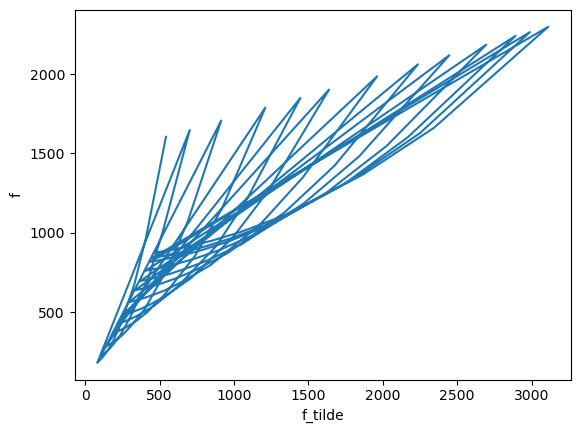

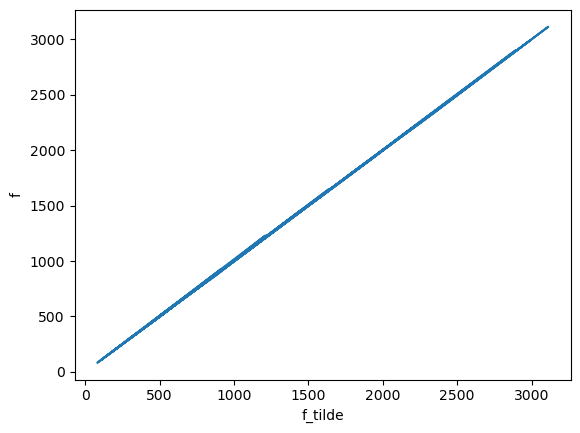

In [39]:
from scipy.optimize import minimize
# Hier eigenen Code schreiben ...

########### X needs to be recomputed #############
             
# Ergebnis berechnen
res1 = minimize(loss, np.ones(3), args = (model(d,v,1), f_tilde), method = 'Nelder-Mead') # 1.Modell
res2 = minimize(loss, np.ones(4), args = (model(d,v,2), f_tilde), method = 'Nelder-Mead') # 2.Modell
res3 = minimize(loss, np.ones(2), args = (model(d,v,3), f_tilde), method = 'Nelder-Mead') # 3.Modell 

# Koeffizienten
beta1 = res1.x
beta2 = res2.x
beta3 = res3.x

# teste Ergebnisse
print("Model 1 Results:")
print("Coefficients:", res1.x)
print("Converged:", res1.success)
print("Message:", res1.message)
print("Iterations:", res1.nit)
print("Fehler Modell 1: %.10f" %(loss(beta1, model(d,v,1), f_tilde)))

print("\nModel 2 Results:")
print("Coefficients:", res2.x)
print("Converged:", res2.success)
print("Message:", res2.message)
print("Iterations:", res2.nit)
print("Fehler Modell 2: %.10f" %(loss(beta2, model(d,v,2), f_tilde)))

print("\nModel 3 Results:")
print("Coefficients:", res3.x)
print("Converged:", res3.success)
print("Message:", res3.message)
print("Iterations:", res3.nit)
print("Fehler Modell 3: %.10f" %(loss(beta3, model(d,v,3), f_tilde)))


# wir nutzen Model 3 für unsere Messungen
beta = res1.x
plt.plot(f_tilde,model(d,v,1)@beta1)
plt.xlabel("f_tilde")
plt.ylabel("f")
plt.show()
plt.plot(f_tilde,model(d,v,2)@beta2)
plt.xlabel("f_tilde")
plt.ylabel("f")
plt.show()
plt.plot(f_tilde,model(d,v,3)@beta3)
plt.xlabel("f_tilde")
plt.ylabel("f")
plt.show()

In [40]:
# Hier sind einige Plausibilitätstests:
_tloss = loss(beta,X,f_tilde)
_lbeta = len(beta)
assert (7e15<_tloss<8e15) or (9e4<_tloss<12e4) or (_tloss < 30)
assert not(7e15<_tloss<8e15) or _lbeta==3
assert not(11e4<_tloss<12e4) or _lbeta==3
assert not(9e4<_tloss<10e4) or _lbeta==4

### 3) Vorhersage

**Wenden Sie das Modell an.**

  * Wie hoch ist die Hiebton-Frequenz `f3` bei einem Zylinderdurchmesser von 10 mm und einer Strömungsgeschwindigkeit von 20 m/s?
  * Wie groß ist der Durchmesser `d3` eines Zylinders, der bei 42 m/s Windgeschwindigkeit mit 1000 Hz pfeift?
  * Wie groß ist die Strömungsgeschwindigkeit `v3`, wenn ein Zylinder mit 30 mm Durchmesser einen Ton bei 300 Hz verursacht?
  
_Verwenden Sie für die Ergebnisse SI-Einheiten._

In [41]:
# Hier eigenen Code schreiben ...
dx1 = 10/1000 # Zylinderdurchmesser
dx2 = 30/1000
vx1 = 20      # Strömungsgeschwindigkeit
vx2 = 42
fx1 = 10**3
fx2 = 300

# 1)
f3 = beta3[0]*vx1/dx1+beta3[1]*(vx1**3)/(dx1**3)
print("Hiebton-Frequenz: %.3f Hz" %(f3))

# 2)
# ß_2 << 0 deswegen vernachlässigen
res4 = minimize(loss, np.ones(1), args = (model(d,v,4), f_tilde), method = 'Nelder-Mead') # 3.Modell 
print("\nModel 4 Results:")
print("Coefficients:", res4.x)
print("Converged:", res4.success)
print("Message:", res4.message)
print("Iterations:", res4.nit)
print("Fehler Modell 4: %.10f" %(loss(res4.x, model(d,v,4), f_tilde)))

d3 = beta3[0]*vx2/fx1
print("\nDurchmesser: %.4f m" %(d3))

v3 = fx2*dx2/beta3[0]
print("\nStrömungsgeschwindigkeit: %.3f m/s" %(v3))

Hiebton-Frequenz: 394.757 Hz

Model 4 Results:
Coefficients: [0.19736633]
Converged: True
Message: Optimization terminated successfully.
Iterations: 21
Fehler Modell 4: 14.2941522338

Durchmesser: 0.0083 m

Strömungsgeschwindigkeit: 45.598 m/s


In [42]:
# Hier sind einige Plausibilitätstests:
assert d3<v3<f3
assert np.isclose(d3*v3*f3, 150, atol=1)